# Ground state

In [24]:
import veloxchem as vlx

The initial structure can e.g. be defined in terms of a SMILES string.

In [63]:
molecule = vlx.Molecule.read_smiles("OC=CC=O")
molecule.show(atom_indices=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Define the electronic structure theory method.

In [26]:
scf_drv = vlx.XtbDriver()
scf_drv.ostream.mute()

Optimize the molecule structure with the `OptimizationDriver` class in VeloxChem.

In [28]:
opt_drv = vlx.OptimizationDriver(scf_drv)
opt_drv.ostream.mute()

opt_results = opt_drv.compute(molecule)

The SCF energies calculated in the optimization process are available in the resulting object.

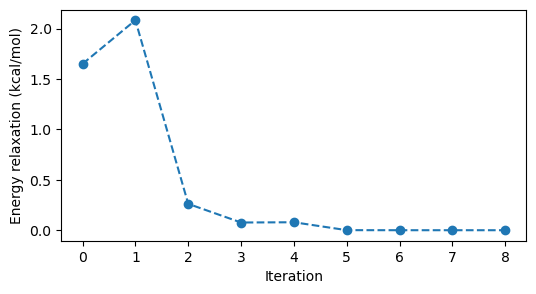

In [65]:
from matplotlib import pyplot as plt

e_min_in_au = min(opt_results["opt_energies"])

energies_in_kcalpermol = [
    (e - e_min_in_au) * vlx.hartree_in_kcalpermol() for e in opt_results["opt_energies"]
]

fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(energies_in_kcalpermol, "o--")

ax.set_xlabel("Iteration")
ax.set_ylabel(r"Energy relaxation (kcal/mol)")

plt.show()

The molecular structure relaxation can be visualized.

In [68]:
import py3Dmol as p3d

viewer = p3d.view(width=400, height=300)

viewer.addModelsAsFrames("".join(opt_results["opt_geometries"]))
viewer.animate({"loop": "forward"})
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})

viewer.zoomTo()

viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Larger molecules

[Cafestol](https://en.wikipedia.org/wiki/Cafestol) and [kahweol](https://en.wikipedia.org/wiki/Kahweol) are molecules present in Robusta and Arabica coffee beans, respectively.

We here use the semi-empirical tight binding method named xTB and a [code implementation](https://xtb-docs.readthedocs.io/en/latest/) that has been interfaced to VeloxChem.

In [35]:
cafestol_xyz = """51
cafestol initial structure
O  -4.5215   -1.3455    0.4926
O  -5.2905    0.0812   -1.7033
O   5.1630    0.4345   -0.1101
C  -1.2807   -0.7511   -0.0465
C  -0.5244    0.5810   -0.4102
C   0.9909    0.6610    0.0407
C  -2.9440    0.2916    1.2866
C  -1.8143   -0.7311    1.3945
C  -2.6188   -0.8159   -0.8642
C  -3.7116   -0.2387    0.0606
C  -0.4332   -2.0024   -0.3283
C  -1.3742    1.8303   -0.0654
C   1.6844   -0.6873   -0.4019
C  -2.3206    1.6833    1.1309
C   0.9997   -1.9155    0.1913
C   1.7285    1.8344   -0.7277
C   1.1437    0.9261    1.5588
C   3.1644   -0.6155   -0.2085
C  -4.6490    0.7442   -0.6282
C   3.2525    1.9378   -0.4590
C   3.8298    0.5879   -0.2856
C   4.1654   -1.5888    0.0140
C   5.3604   -0.9015    0.0689
H  -0.4604    0.5817   -1.5108
H  -3.5646    0.2626    2.1897
H  -1.0861   -0.4449    2.1498
H  -2.1902   -1.7145    1.7003
H  -2.5286   -0.2495   -1.7981
H  -2.8534   -1.8505   -1.1460
H  -0.3943   -2.1694   -1.4136
H  -0.9135   -2.8938    0.0946
H  -1.9810    2.0650   -0.9487
H  -0.7587    2.7222    0.0818
H   1.5605   -0.7646   -1.4951
H  -1.7642    1.9154    2.0477
H  -3.1082    2.4431    1.0635
H   1.0176   -1.9046    1.2859
H   1.5276   -2.8282   -0.1118
H   1.2808    2.8061   -0.4944
H   1.5851    1.6842   -1.8068
H   0.5898    1.8173    1.8670
H   0.8147    0.0892    2.1727
H   2.1832    1.0992    1.8532
H  -4.1337    1.6158   -1.0351
H  -5.4265    1.0934    0.0595
H   3.4273    2.5264    0.4487
H   3.7385    2.4646   -1.2871
H  -3.9519   -2.0832    0.7635
H   4.0442   -2.6573    0.1180
H  -5.7603   -0.6874   -1.3370
H   6.3869   -1.2031    0.2186
"""
cafestol = vlx.Molecule.read_xyz_string(cafestol_xyz)

In [36]:
kahweol_xyz = """49
kahweol initial structure
O  -4.4710   -1.5361    0.0905
O  -5.6188    0.9753   -0.0811
O   5.1625    0.5695   -0.0997
C  -1.2209   -0.8317   -0.2017
C  -0.4821    0.5357   -0.4703
C  -3.0038    0.1167    1.0462
C  -1.8514   -0.8737    1.1997
C  -2.4967   -0.9058   -1.1119
C   0.9884    0.6333    0.0944
C  -3.6676   -0.3924   -0.2474
C  -0.3220   -2.0551   -0.4569
C  -1.3919    1.7479   -0.1363
C  -2.4167    1.5304    0.9816
C   1.7435   -0.6786   -0.3542
C   1.0741   -1.9483    0.1552
C   1.0367    0.8330    1.6293
C  -4.5845    0.5870   -0.9677
C   1.7610    1.8511   -0.4907
C   3.2146   -0.5444   -0.1101
C   3.1013    1.8722   -0.6493
C   3.8167    0.6946   -0.3059
C   4.2309   -1.4546    0.2464
C   5.3980   -0.7259    0.2399
H  -0.3415    0.5842   -1.5631
H  -3.6779    0.0397    1.9072
H  -1.1861   -0.6021    2.0159
H  -2.2356   -1.8757    1.4322
H  -2.3648   -0.3090   -2.0216
H  -2.6844   -1.9384   -1.4328
H  -0.2098   -2.1924   -1.5413
H  -0.8043   -2.9694   -0.0890
H  -1.9406    2.0033   -1.0514
H  -0.8134    2.6482    0.0921
H  -1.9341    1.7452    1.9434
H  -3.2193    2.2709    0.8849
H   1.6699   -0.7251   -1.4553
H   1.0259   -1.9792    1.2481
H   1.6508   -2.8307   -0.1490
H   2.0514    1.0518    1.9842
H   0.4166    1.6762    1.9486
H   0.7233   -0.0489    2.1864
H  -5.0524    0.1195   -1.8415
H  -4.0679    1.4861   -1.3088
H   1.2088    2.7568   -0.7218
H  -5.0925   -1.2746    0.7905
H   3.6240    2.7536   -0.9997
H   4.1386   -2.5085    0.4650
H  -6.2132    0.2149    0.0339
H   6.4308   -0.9731    0.4374
"""
kahweol = vlx.Molecule.read_xyz_string(kahweol_xyz)

The difference between cafestol and kahweol is very subtle, essentially only one double bond and two H atoms.

We optimize structures and compare the initial and final geometries.

In [40]:
scf_drv = vlx.XtbDriver()
scf_drv.ostream.mute()

In [50]:
opt_drv = vlx.OptimizationDriver(scf_drv)
opt_drv.ostream.mute()

opt_cafestol_results = opt_drv.compute(cafestol)
opt_kahweol_results = opt_drv.compute(kahweol)

In [67]:
viewer = p3d.view(viewergrid=(1, 2), width=600, height=250, linked=True)

viewer.addModel(cafestol_xyz, "xyz", viewer=(0, 0))
viewer.addModel(opt_cafestol_results["final_geometry"], "xyz", viewer=(0, 0))

viewer.addModel(kahweol_xyz, "xyz", viewer=(0, 1))
viewer.addModel(opt_kahweol_results["final_geometry"], "xyz", viewer=(0, 1))

viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})

viewer.zoomTo()

viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The initial and final structures are close so you may need to zoom in to see the subtle differences.